# Data Loading

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = './Processed_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class
0,0,22058,20150224225549,20150418024711,34,0,0,0,39,7.327584e+08,0
1,1,333320,20150607203950,20150608013854,16,1,0,1,53,3.503114e+08,0
2,2,1359,20150101185244,20150101185245,15,0,1,0,53,2.621474e+09,1
3,3,150084,20150428211325,20150504135450,44,0,2,0,41,3.840542e+09,0
4,4,221365,20150721070952,20150909184053,39,1,2,0,45,4.155831e+08,0


In [2]:
data

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class
0,0,22058,20150224225549,20150418024711,34,0,0,0,39,7.327584e+08,0
1,1,333320,20150607203950,20150608013854,16,1,0,1,53,3.503114e+08,0
2,2,1359,20150101185244,20150101185245,15,0,1,0,53,2.621474e+09,1
3,3,150084,20150428211325,20150504135450,44,0,2,0,41,3.840542e+09,0
4,4,221365,20150721070952,20150909184053,39,1,2,0,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,151107,345170,20150127030334,20150329003047,43,0,0,0,28,3.451155e+09,1
151108,151108,274471,20150515174329,20150526122439,35,0,2,0,32,2.439047e+09,0
151109,151109,368416,20150303230731,20150520070747,40,0,3,1,26,2.748471e+09,0
151110,151110,207709,20150709200607,20150907093446,46,0,0,0,37,3.601175e+09,0


# Data Preprocessing

In [3]:
# Step 1: Checking for missing values
missing_values = data.isnull().sum()
missing_values


Unnamed: 0        0
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [4]:
data.dtypes

Unnamed: 0          int64
user_id             int64
signup_time         int64
purchase_time       int64
purchase_value      int64
source              int64
browser             int64
sex                 int64
age                 int64
ip_address        float64
class               int64
dtype: object

In [5]:
# Step 2: Convert time columns from string to datetime
data['signup_time'] = pd.to_datetime(data['signup_time'], format='%Y%m%d%H%M%S')
data['purchase_time'] = pd.to_datetime(data['purchase_time'], format='%Y%m%d%H%M%S')

data.dtypes

Unnamed: 0                 int64
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
source                     int64
browser                    int64
sex                        int64
age                        int64
ip_address               float64
class                      int64
dtype: object

In [6]:
# Step 3: Create a new feature for the time difference between signup and purchase
data['time_diff'] = (data['purchase_time'] - data['signup_time']).dt.total_seconds()

data.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,time_diff
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,0,0,0,39,7.327584e+08,0,4506682.0
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,1,0,1,53,3.503114e+08,0,17944.0
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,0,1,0,53,2.621474e+09,1,1.0
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,0,2,0,41,3.840542e+09,0,492085.0
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,1,2,0,45,4.155831e+08,0,4361461.0


In [7]:
# Step 4: Removing the 'Unnamed: 0' column from the dataset
data = data.drop('Unnamed: 0', axis=1)

# Display the first few rows of the dataset to confirm the removal of the column
data.head()


,user_id,signup_time,purchase_time,purchase_value,source,browser,sex,age,ip_address,class,time_diff
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,0,0,0,39,7.327584e+08,0,4506682.0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,1,0,1,53,3.503114e+08,0,17944.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,0,1,0,53,2.621474e+09,1,1.0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,0,2,0,41,3.840542e+09,0,492085.0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,1,2,0,45,4.155831e+08,0,4361461.0


# Exploratory Data Analysis (EDA)


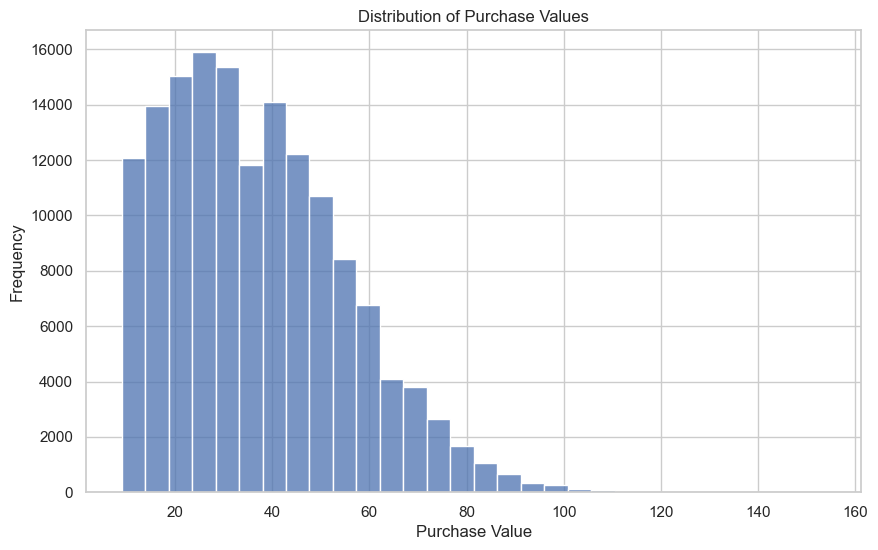

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Setting up the visualisation environment
sns.set(style="whitegrid")

# Visualizing the distribution of 'purchase_value'
plt.figure(figsize=(10, 6))
sns.histplot(data['purchase_value'], kde=False, bins=30)
plt.title('Distribution of Purchase Values')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()




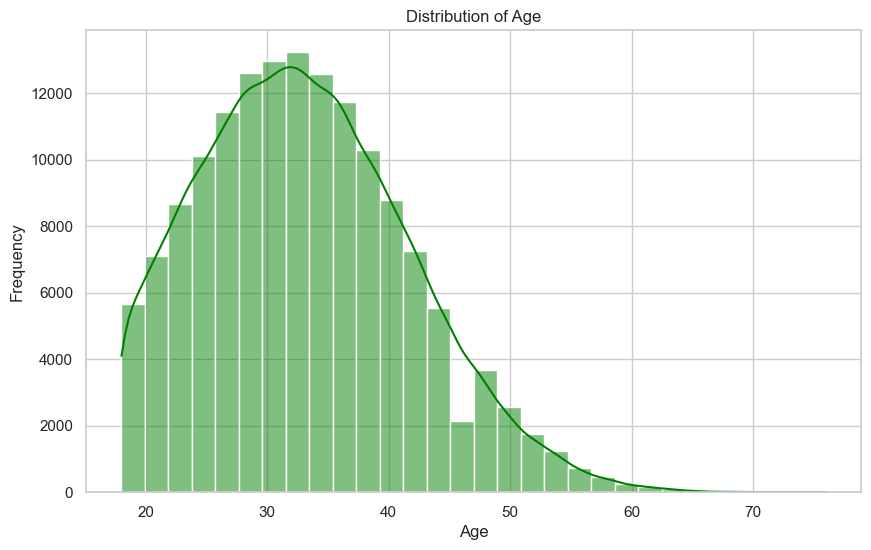

In [9]:
# Visualizing the distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, bins=30, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



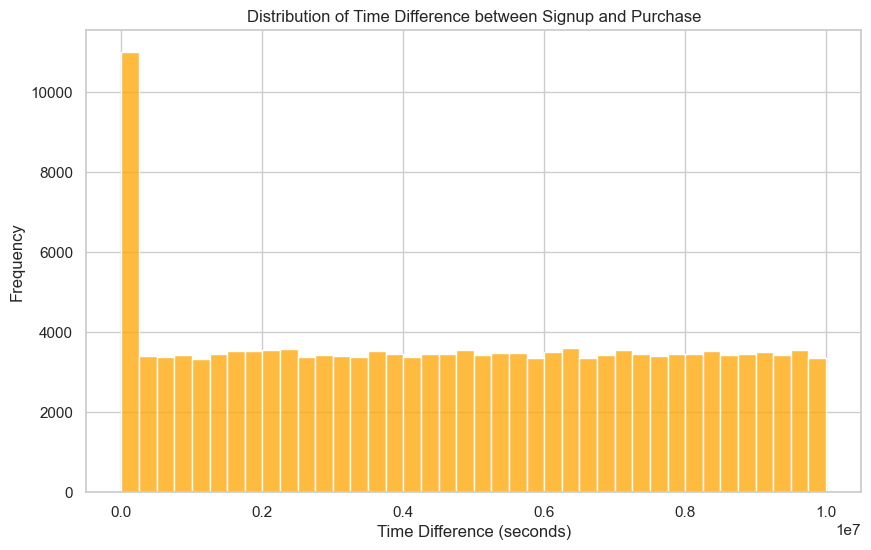

In [10]:
# Visualizing the distribution of 'time_diff'
plt.figure(figsize=(10, 6))
sns.histplot(data[data['time_diff'] < 1e7]['time_diff'], kde=False, bins=40, color='orange')  # Limiting to smaller time_diff values for better visibility
plt.title('Distribution of Time Difference between Signup and Purchase')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()



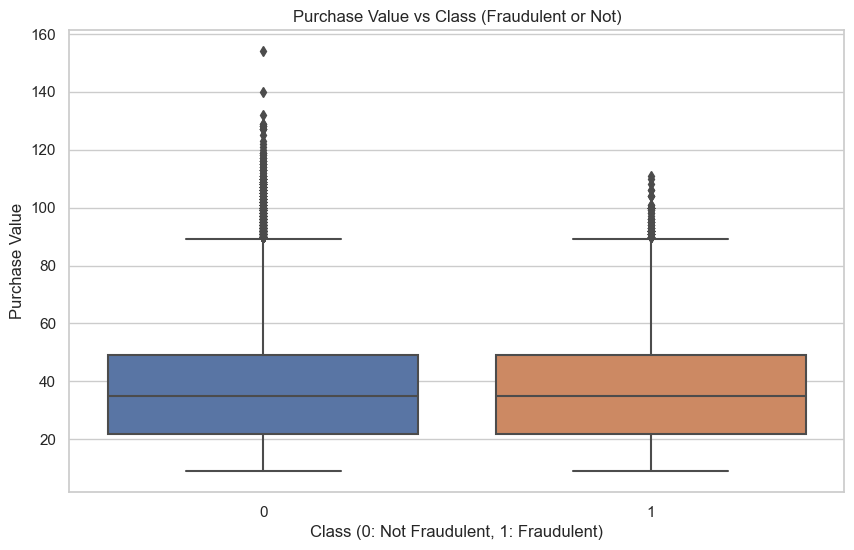

In [11]:
# Visualizing the relationship between 'purchase_value' and 'class'
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=data)
plt.title('Purchase Value vs Class (Fraudulent or Not)')
plt.xlabel('Class (0: Not Fraudulent, 1: Fraudulent)')
plt.ylabel('Purchase Value')
plt.show()

# Model Development

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Feature Engineering: Adding day of the week and hour of the day for signup and purchase times
data['signup_day'] = data['signup_time'].dt.dayofweek
data['signup_hour'] = data['signup_time'].dt.hour
data['purchase_day'] = data['purchase_time'].dt.dayofweek
data['purchase_hour'] = data['purchase_time'].dt.hour

# Dropping the original datetime columns as they are not needed for model training
data = data.drop(['signup_time', 'purchase_time'], axis=1)

# Preparing the dataset for model training
X = data.drop('class', axis=1)  # Features
y = data['class']  # Target

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



In [13]:
data

,user_id,purchase_value,source,browser,sex,age,ip_address,class,time_diff,signup_day,signup_hour,purchase_day,purchase_hour
0,22058,34,0,0,0,39,7.327584e+08,0,4506682.0,1,22,5,2
1,333320,16,1,0,1,53,3.503114e+08,0,17944.0,6,20,0,1
2,1359,15,0,1,0,53,2.621474e+09,1,1.0,3,18,3,18
3,150084,44,0,2,0,41,3.840542e+09,0,492085.0,1,21,0,13
4,221365,39,1,2,0,45,4.155831e+08,0,4361461.0,1,7,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,43,0,0,0,28,3.451155e+09,1,5261233.0,1,3,6,0
151108,274471,35,0,2,0,32,2.439047e+09,0,931270.0,4,17,1,12
151109,368416,40,0,3,1,26,2.748471e+09,0,6681616.0,1,23,2,7
151110,207709,46,0,0,0,37,3.601175e+09,0,5146119.0,3,20,0,9


# Model 1 Logistic Regression

Logistic Regression Model Performance Metrics:
Accuracy: 0.906979309127807
Precision (Class 0 - Non-Fraudulent): 0.906979309127807
Precision (Class 1 - Fraudulent): 0.0
Recall (Class 0 - Non-Fraudulent): 1.0
Recall (Class 1 - Fraudulent): 0.0
F1 Score (Class 0 - Non-Fraudulent): 0.9512209228349007
F1 Score (Class 1 - Fraudulent): 0.0


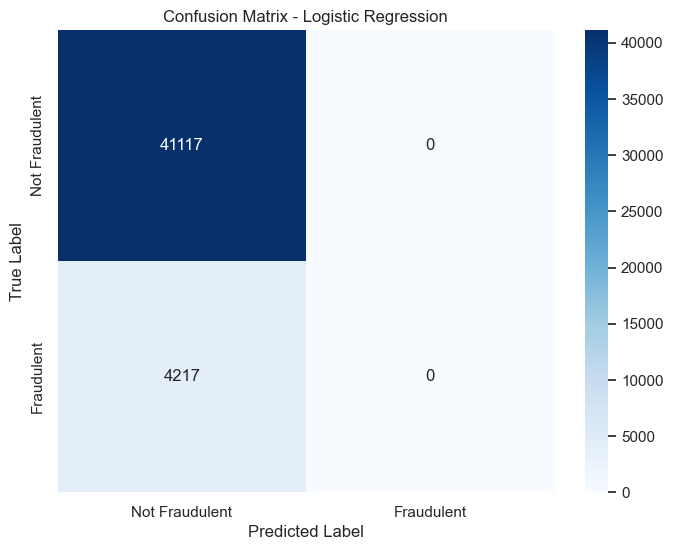

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Model Training using Logistic Regression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predicting using the Logistic Regression model
y_pred_lr = model_lr.predict(X_test)

# Calculating performance metrics for Logistic Regression model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_class_0_lr = precision_score(y_test, y_pred_lr, pos_label=0)
precision_class_1_lr = precision_score(y_test, y_pred_lr, pos_label=1)
recall_class_0_lr = recall_score(y_test, y_pred_lr, pos_label=0)
recall_class_1_lr = recall_score(y_test, y_pred_lr, pos_label=1)
f1_class_0_lr = f1_score(y_test, y_pred_lr, pos_label=0)
f1_class_1_lr = f1_score(y_test, y_pred_lr, pos_label=1)

# Printing the metrics for Logistic Regression
print("Logistic Regression Model Performance Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision (Class 0 - Non-Fraudulent):", precision_class_0_lr)
print("Precision (Class 1 - Fraudulent):", precision_class_1_lr)
print("Recall (Class 0 - Non-Fraudulent):", recall_class_0_lr)
print("Recall (Class 1 - Fraudulent):", recall_class_1_lr)
print("F1 Score (Class 0 - Non-Fraudulent):", f1_class_0_lr)
print("F1 Score (Class 1 - Fraudulent):", f1_class_1_lr)

# Generating the confusion matrix for Logistic Regression
confusion_mat_lr = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_lr, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


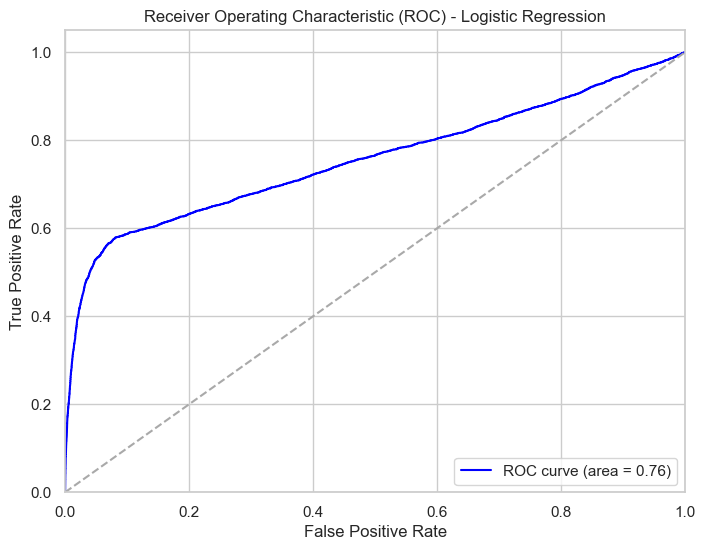

In [15]:
# Plotting Receiver Operating Characteristic (ROC) curve for Logistic Regression Model

from sklearn.metrics import roc_curve, roc_auc_score

# Predicting probabilities
y_pred_prob_lr = model_lr.predict_proba(X_test)[:, 1]

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_lr)
roc_auc = roc_auc_score(y_test, y_pred_prob_lr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


# Model 2 : Random Forest Classifier

Model Performance Metrics:
Accuracy: 0.9574050381612035
Precision (Class 0 - Non-Fraudulent): 0.955164242902941
Precision (Class 1 - Fraudulent): 0.9995629370629371
Recall (Class 0 - Non-Fraudulent): 0.9999756791594717
Recall (Class 1 - Fraudulent): 0.5423286696703817
F1 Score (Class 0 - Non-Fraudulent): 0.9770564262205482
F1 Score (Class 1 - Fraudulent): 0.7031514219830899


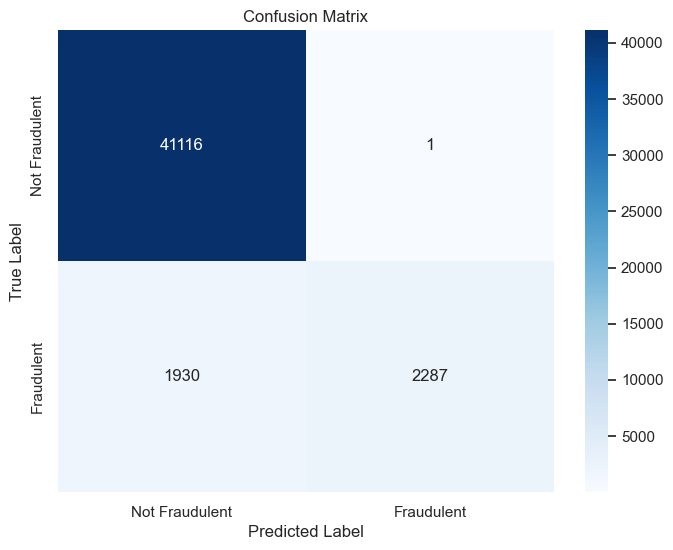

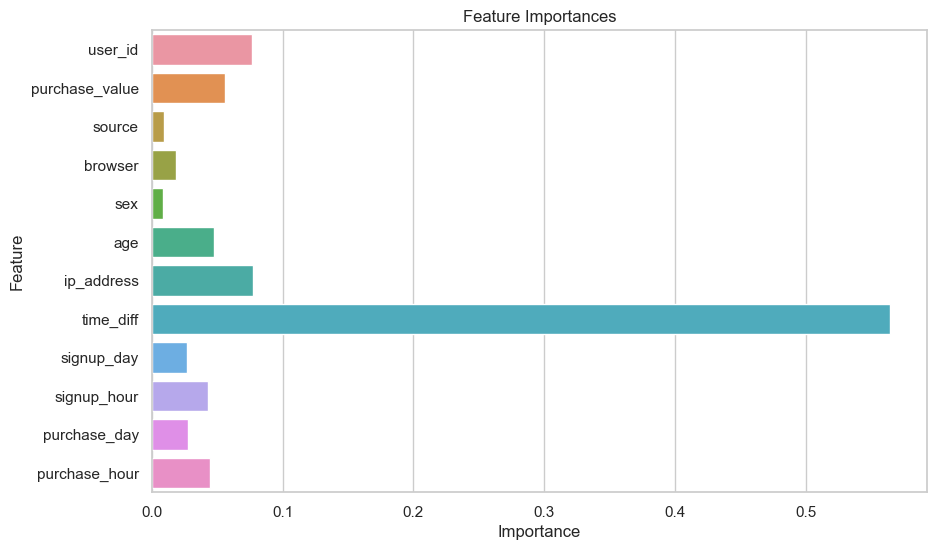

In [16]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Model Training: Using Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)


# Calculating accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision_class_0 = precision_score(y_test, y_pred, pos_label=0)
precision_class_1 = precision_score(y_test, y_pred, pos_label=1)
recall_class_0 = recall_score(y_test, y_pred, pos_label=0)
recall_class_1 = recall_score(y_test, y_pred, pos_label=1)
f1_class_0 = f1_score(y_test, y_pred, pos_label=0)
f1_class_1 = f1_score(y_test, y_pred, pos_label=1)

# Printing the metrics
print("Model Performance Metrics:")
print("Accuracy:", accuracy)
print("Precision (Class 0 - Non-Fraudulent):", precision_class_0)
print("Precision (Class 1 - Fraudulent):", precision_class_1)
print("Recall (Class 0 - Non-Fraudulent):", recall_class_0)
print("Recall (Class 1 - Fraudulent):", recall_class_1)
print("F1 Score (Class 0 - Non-Fraudulent):", f1_class_0)
print("F1 Score (Class 1 - Fraudulent):", f1_class_1)
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Fraudulent', 'Fraudulent'], yticklabels=['Not Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importances from the Random Forest model
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
